# Лабораторная работа №1.  ДВПФ и ДПФ
## Вариант 6.

# Модуль 1. Свойства ДВПФ.

## Задача 1.1. ДВПФ и взвешивание гармонического сигнала окном


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:| 
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |
|$n_0$|  3 |  5 |  2 |  5 |  4 |  6 |  7 |  7 |  5 |  5 |


Найти аналитически ДВПФ $N$ - точечных последовательностей
$$x[k]=\sum_{m=0}^{N-1}\mathbf{1}[k-m]\;\;\;\;y[k]=x[k]\cos\left(2\pi k\dfrac{n_0}{N}\right)$$  

Построить графики последовательностей $x[k]$ и $y[k]$.
Изобразить графики модуля ДВПФ для частот $\nu \in [-0.5, \; 0.5]$
* а) используя полученные аналитические формулы;
* б) используя функцию ```np.fft.fft()```.

Сравнить полученные результаты. 

$$
\mathcal{X}(\nu) = \sum \limits_{k = 0}^{N-1} x(k)e^{-j2\pi \nu k} = \sum \limits_{k = 0}^{N-1} e^{-j2\pi \nu k} = 
\dfrac{1 - e^{-j 2 \pi \nu N}}{1 - e^{-j 2 \pi \nu}} =
\dfrac{e^{-j \pi \nu N}}{e^{-j \pi \nu}} \dfrac{e^{j \pi \nu N} - e^{-j \pi \nu N}}{e^{j \pi \nu} - e^{-j \pi \nu}} 
= e^{-j \pi \nu (N-1)}\dfrac{\sin(N \pi \nu)}{\sin(\pi \nu)}.\quad \\

\mathcal{Z}(\nu) = \dfrac{1}{2}\sum \limits_{m = -\infty}^{+\infty}\Big[\delta\big(\nu - \frac{n_0}{N}-m\big) + \delta\big(\nu + \frac{n_0}{N}-m\big)\Big].\\

\mathcal{Y}(\nu) = \int \limits_{-\frac{1}{2}}^{\frac{1}{2}}\mathcal{X}(\tilde{\nu})\mathcal{Z}(\nu - \tilde{\nu})d\tilde{\nu} =
\dfrac{1}{2}\int \limits_{-\frac{1}{2}}^{\frac{1}{2}}\mathcal{X}(\tilde{\nu})
\sum \limits_{m = -\infty}^{+\infty}\Big[\delta\big(\nu - \tilde{\nu} - \frac{n_0}{N}-m\big) + \delta\big(\nu - \tilde{\nu} + \frac{n_0}{N}-m\big)\Big]d \tilde{\nu} =
\dfrac{1}{2} \left\{ \mathcal{X} \big(\nu - \frac{n_0}{N}\big) + \mathcal{X} \big(\nu + \frac{n_0}{N}\big)\right\} = e^{-j \pi (N-1)(\nu - \frac{n_0}{N})}\dfrac{\sin(N \pi (\nu - \frac{n_0}{N}))}{2\sin(\pi (\nu - \frac{n_0}{N}))} + e^{-j \pi (N-1)(\nu + \frac{n_0}{N})}\dfrac{\sin(N \pi (\nu + \frac{n_0}{N}))}{2\sin(\pi (\nu + \frac{n_0}{N}))}.
$$

In [30]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import scipy.io.wavfile
import soundfile as sf
import time

from matplotlib import ticker
from scipy import signal

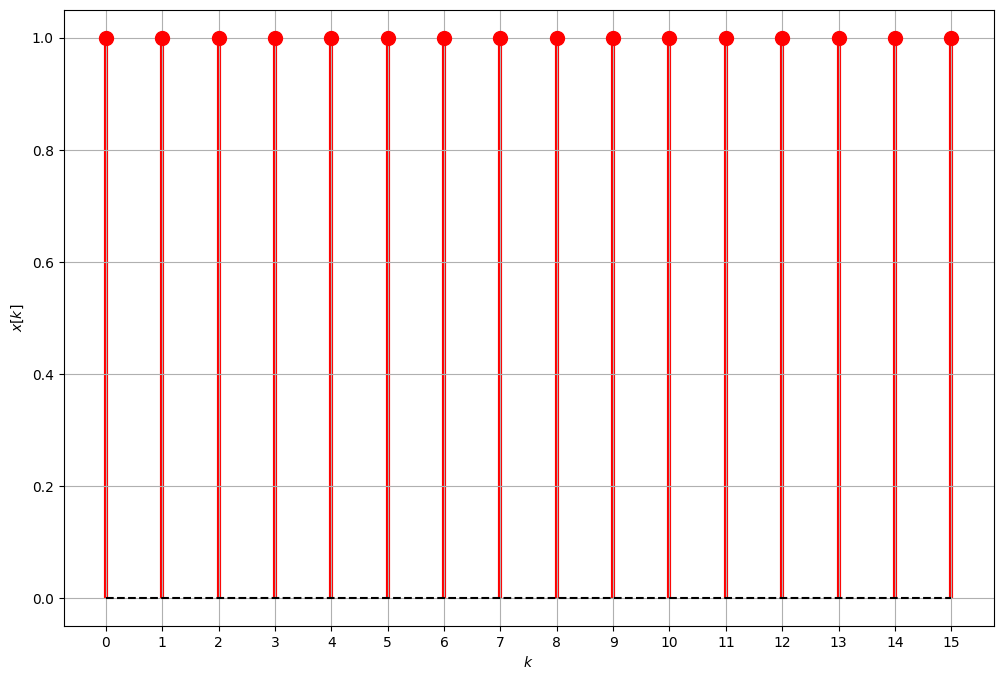

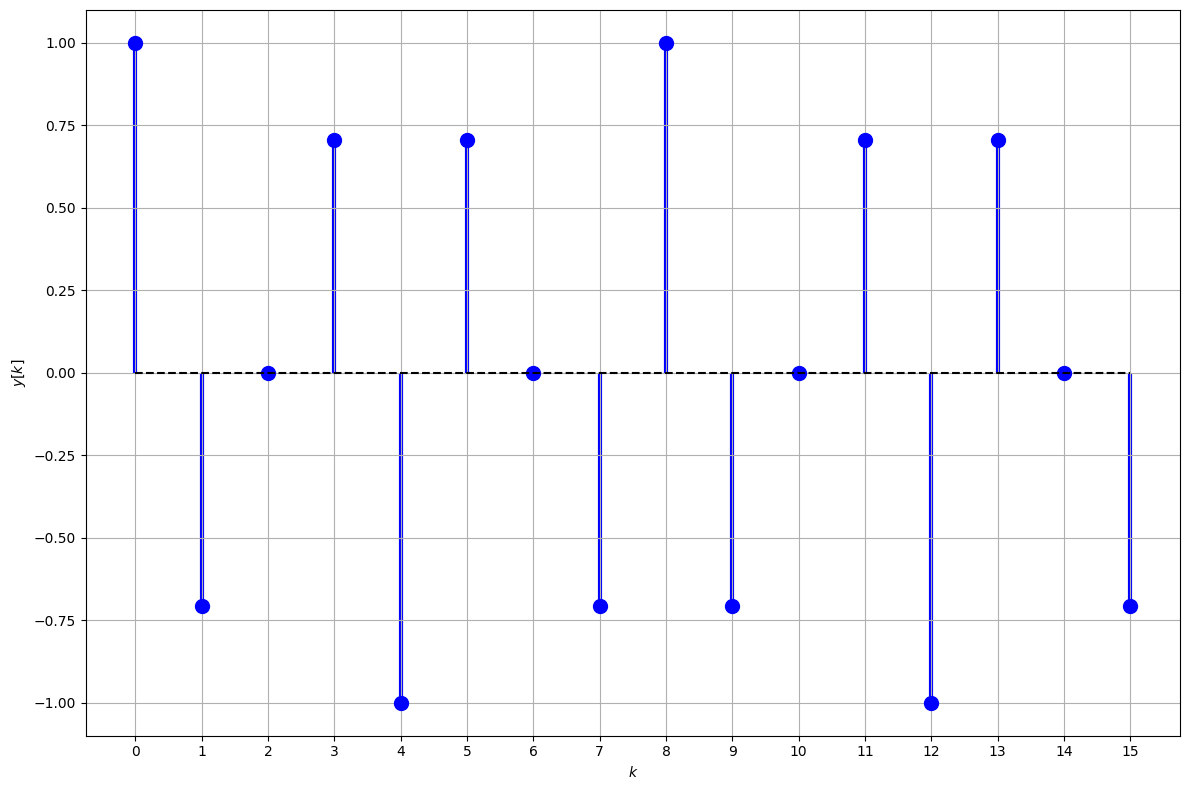

In [31]:
N = 16
n_0 = 6

k = np.arange(N)
x = np.ones(k.size)
y = np.cos(2*np.pi*k*n_0/N)

fig, ax = plt.subplots(figsize=(12,8))

ml, sl, bl = plt.stem(k, x, 'r', basefmt = 'k--', markerfmt = 'ro')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xticks(k)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.grid()
plt.show()
plt.close()

fig, ax = plt.subplots(figsize=(12,8))
ml, sl, bl = plt.stem(k, y, 'b', basefmt = 'k--', markerfmt = 'bo')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xticks(k)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.grid()

plt.tight_layout()
plt.show()

plt.close()

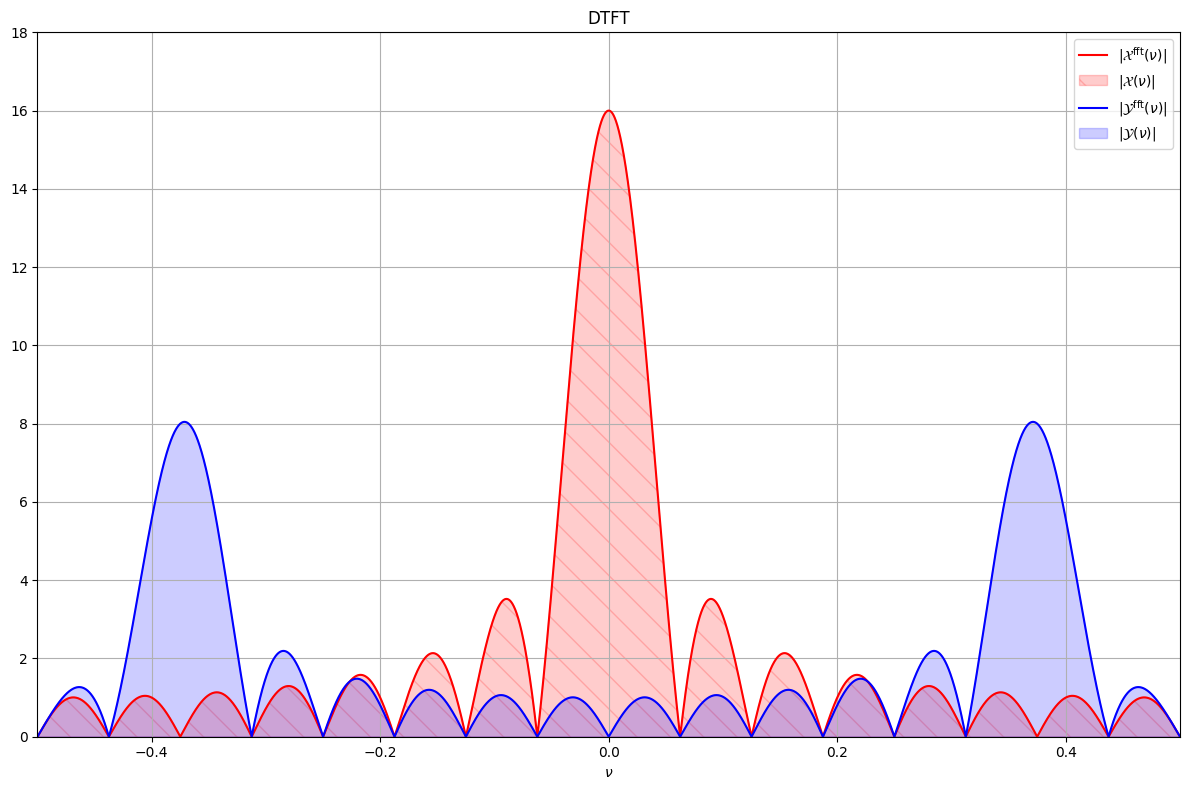

In [32]:
fig, ax = plt.subplots(figsize=(12,8))

def DTFT_abs(x, M = 2**13):
    return (-0.5+(np.arange(M)/M), 
            abs(np.fft.fftshift(np.fft.fft(x, M))))

def X(tick):
    return abs(np.sin(N*np.pi*tick)/np.sin(np.pi*tick))

def Y(tick):
    nu_0 = n_0/N
    return abs(0.5 * np.exp(-1j * np.pi * (N-1) * (tick - nu_0)) * np.sin(N*np.pi*(tick - nu_0))/np.sin(np.pi*(tick - nu_0)) +
               0.5 * np.exp(-1j * np.pi * (N-1) * (tick + nu_0)) * np.sin(N*np.pi*(tick + nu_0))/np.sin(np.pi*(tick + nu_0)))
    
nu = np.linspace(-0.7, 0.7, 2**10)
plt.plot(DTFT_abs(x)[0], DTFT_abs(x)[1], color = 'red', label = '$|\mathcal{X}^{\\text{fft}}(\\nu)|$')
plt.fill_between(nu, X(nu), color = 'red', alpha = 0.2, label = '$|\mathcal{X}(\\nu)|$', hatch = '\\')
plt.plot(DTFT_abs(y)[0], DTFT_abs(y)[1], color = 'blue', label = '$|\mathcal{Y}^{\\text{fft}}(\\nu)|$')
plt.fill_between(nu, Y(nu), color = 'blue', alpha = 0.2, label = '$|\mathcal{Y}(\\nu)|$')
plt.xlim(-0.5, 0.5)
plt.ylim(0, N+2)

plt.legend()
plt.title('DTFT')
plt.xlabel('$\\nu$')
plt.grid()

plt.tight_layout()
plt.show()

## Задача 1.2. Симметрия ДВПФ

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|    $N$    | 12 | 17 | 14 | 15 | 13 | 16 | 20 | 24 | 22 | 18 |


Создайте произвольную действительную последовательность отсчетов $x[k]$ длиной $N$ отсчетов. Постройте с помощью компьютерного моделирования графики следующих функций  для частот $\nu \in [-0.5, \; 0.5]$:
* модуль ДВПФ $|X(\nu)|$,
* фазовая часть ДВПФ $\varphi(\nu)=\angle X(\nu)$,
* действительная часть ДВПФ $\text{Re } X(\nu)$,
* мнимая  часть ДВПФ $\text{Im } X(\nu)$.

Определите, являются ли они симметричными либо антисимметричными относительно нулевой частоты.

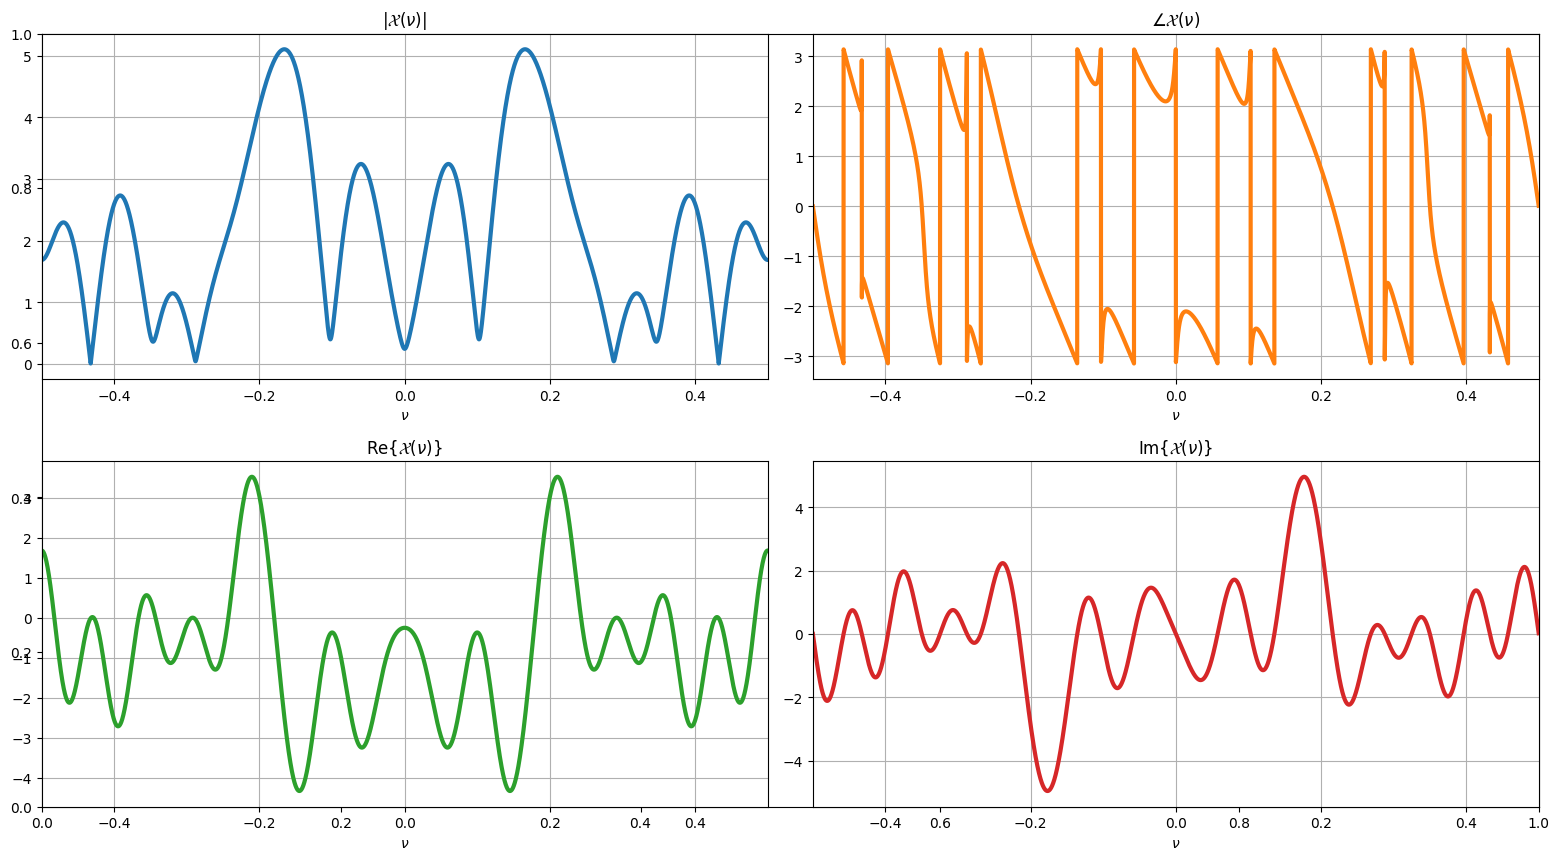

In [33]:
N = 16
x = np.random.rand(N) * 2 - 1 # random from -1 to +1

def DTFT(x, M = 2**13):
    return (-0.5+(np.arange(M)/M), np.fft.fftshift(np.fft.fft(x, M)))

nu, X = DTFT(x)
fig, ax = plt.subplots(figsize=(16,9))

for i, (function, title) in enumerate(zip([np.abs, np.angle, np.real, np.imag],
                                          ['$|\mathcal{X}(\\nu)|$', '$\\angle  \mathcal{X}(\\nu)$', 'Re$\{\mathcal{X}(\\nu)\}$', 'Im$\{\mathcal{X}(\\nu)\}$'])):
    plt.subplot(2, 2, i+1)
    plt.plot(nu, function(X), 'C%d'%i, lw = 3)
    plt.xlim(-0.5, 0.5)
    plt.title(title)
    plt.xlabel('$\\nu$')
    plt.grid()

plt.tight_layout()
plt.show()

# Модуль 2. Свойства ДПФ.




## Задача 2.1. Циклический сдвиг ДПФ

| Варианты: |  $x[k]$  | $n_0$ |  $l$  |
|:---------:|:--------:|:----:|:-----:|
|**1**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;2.0\;\;3.3\}$$|  -3  |  6  |
|**2**|$$\{\underbrace{3.8}_{k=0}\;\;8.3\;\;0.1\;\;9.1\;\;1.5\;\;10.0\;\;5.1\;\;1.9\}$$|  4  |  8 |
|**3**|$$\{\underbrace{2.8}_{k=0}\;\;0\;\;4.6\;\;0\;\;0.9\;\;0\;\;9.0\;\;0\;\;6.4\;\;0\;\;8.2\;\;0\}$$|  3  |  12  |
|**4**|$$\{\underbrace{2.8}_{k=0} \;\;4.6\;\;0.9\;\;3.8\;\;5.0\;\;1.7\}$$|  3  |  6  |
|**5**|$$\{\underbrace{4.1}_{k=0} \;\;3.5\;\;1.2\;\;5.0\;\;3.0\;\;2.3\;\;5.3\;\;2.1\}$$| -4  |  8  |
|**6**|$$\{\underbrace{3.8}_{k=0}\;\;0\;\;8.3\;\;0\;\;9.1\;\;0\;\;1.9\;\;0\}$$|  -2  |  8  |
|**7**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.3\;\;0.4\;\;0.5\;\;0.6\;\;0.7\;\;0.8\}$$|  -5  |  8  |
|**8**|$$\{\underbrace{0.8}_{k=0}\;\;0.7\;\;0.6\;\;0.5\;\;0.4\;\;0.3\;\;0.2\;\;0.1\}$$|  5  |  8  |
|**9**|$$\{\underbrace{0.1}_{k=0}\;\;0.2\;\;0.4\;\;0.8\;\;1.6\;\;3.2\;\;6.4\;\;12.8\}$$|  7  |  8  |
|**10**|$$\{\underbrace{12.8}_{k=0}\;\;6.4\;\;3.2\;\;1.6\;\;0.8\;\;0.4\;\;0.2\;\;0.1\}$$|  -7  |  8  |

Пусть $x[k]\overset{\text{ДПФ}}\longleftrightarrow X[n]$,  $y[k] \overset{\text{ДПФ}}\longleftrightarrow  Y[n]$, $Y[n]=X[(n+n_0) \mod l],$


1) Вычислите аналитически последовательность $y[k]$ без непосредственного вычисления ДПФ $x[k]$, используя свойства ДПФ.

2) Проведедите моделирование в Python. 
- Вычислите ДПФ $X[n]$ последовательности $x[k]$ (```fft(x)```).
- Осуществите циклический сдвиг $X[n]$ (```np.roll(X, n0)```).
- Вычислите обратное ДПФ для $Y[n]$ (```ifft(Y)```).

In [34]:
l = 8
n_0 = -2

x = np.array([3.8, 0, 8.3, 0, 9.1, 0, 1.9, 0])
y = x * np.exp(-1j*2*np.pi*n_0*np.arange(l)/l)

X = np.fft.fft(x)
Y = np.roll(X, n_0)
y_fft = np.fft.ifft(Y)

res = np.allclose(y, y_fft)
print(f"{res=}")

res=True


## Задача 2.2. Энергия и мощность дискретного сигнала.

| Варианты:|$$X[0]$$| $X[1]$ | $X[2]$ | $X[3]$ | $X[4]$ | $X[5]$ |$$X[6]$$|
|:--------:|:------:|:------:|:------:|:------:|:------:|:------:|:------:|
|  **1**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **2**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **3**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **4**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |
|  **5**  |  11  | $$-4-5j$$ | $$8-3j$$ |$$-2+9j$$ |$$-3+8j$$ | $$2-9j$$ |-4 |
|  **6**  |  10  | $$-6+3j$$ | $$6+3j$$ | $$6-1j$$ | $$1-6j$$ | $$9+5j$$ | 5 |
|  **7**  |  12  | $$-7-5j$$ | $$1-8j$$ | $$4+3j$$ | $$2+6j$$ | $$4-4j$$ | 0 |
|  **8**  |  13  |  $$6-5j$$ | $$8-6j$$ | $$5+5j$$ |$$-3+4j$$ | $$5+9j$$ | 0 |
|  **9**  |  10  |  $$2-7j$$ | $$0+8j$$ | $$8-8j$$ | $$0+6j$$ |$$-1+9j$$ | 9 |
|  **10**  |  14  |  $$5+9j$$ | $$5+7j$$ | $$4+6j$$ | $$3-3j$$ |$$-1-5j$$ | 5 |

Пусть 
$$
X[n]= \sum_{k=0}^{11} x[k] \exp \left(-j \dfrac{2\pi}{N} nk \right)
$$
— 10-точечное ДПФ действительной последовательности $x[k]$ и пусть заданы бины ДПФ в соответствии с вариантом.

1) Воспользовавшись свойствами симметрии, определите значения всех отсчетов ДПФ на одном периоде. 

2) Определите среднее арифметическое значение элементов последовательности $x[k]$:
$$\dfrac{1}{N} \sum_{k=0}^{N-1} x[k]$$
 с использованием значения отсчета ДПФ с номером $n=0$.

3) С использованием равенства Парсеваля для ДПФ определить энергию дискретного сигнала $x[k]$

$$ \sum_{k=0}^{N-1} |x[k]|^2 $$

и мощность для его периодического продолжения с периодом 10
$$ \dfrac{1}{N} \sum_{k=0}^{N-1} |x[k]|^2. $$


4) Вычислите обратное ДПФ с помощью функции ```ifft```, а затем энергию и среднее арифметическое для $x[k]$. 
Сравните с результатами, полученными в п.2 и п.3.


In [35]:
N = 10
X = np.zeros(N, dtype = complex)
X[0] = 10
X[1] = -6+3*1j
X[2] = 6+3*1j
X[3] = 6-1j
X[4] = 1-6*1j
X[5] = 9+5*1j
X[6] = 5

for n in range(9, 6, -1):
    X[n] = X[N - n].conj()
    
    
x = np.fft.ifft(X)
print(np.mean(x))
print(np.sum(abs(x)**2))
print(np.sum(abs(x)**2/N))

(1.0000000000000002+1.3877787807814457e-17j)
52.20000000000002
5.2200000000000015


## Задача 2.3. ДПФ как коэффициенты разложения по базису


| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 12 | 16 | 14 | 16 | 18 | 16 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  7 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  5 |  4 |  2 |  3 |  5 |  4 |  5 |  7 |  5 |  5 |

Вычислите коэффициенты $N$ – точечного ДПФ $X[n]$ для 
$$
\begin{equation} 
x[k]=\left\{\begin{array}{l}\cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) ,\;0\leq k\leq N-1;\\0,\;\;\text{при других  } k.\end{array}\right.
\end{equation}
$$
при заданных $r_1$ и $r_2$ с помощью
 
 * формулы вычисления ДПФ
 * теоремы смещения для ДПФ 
 * как коэффиценты разложения сигнала $x[k]$ по базису из комплексно-экспоненциальных функций  $\varphi_n[k]=\exp(j \dfrac{2\pi}{N} n k)$
 * с помощью функции ```fft```
 
 Сравните результаты. Постройте графики для $|X[n]|$, $\angle X[n]$, $\text{Re } X[n]$, $\text{Im }X[n]$.

$$\mathcal{X}[n] = \sum \limits_{n=0}^{N-1} \Bigg\{ \cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) \Bigg \}\exp{\left(-j\dfrac{2\pi}{N}nk\right)} = 
\sum \limits_{k=0}^{N-1} \Bigg\{
\dfrac{1}{2}\exp{\left(j\dfrac{2\pi}{N}r_1 k\right)} + 
\dfrac{1}{2}\exp{\left(-j\dfrac{2\pi}{N}r_1 k\right)} + 
\dfrac{1}{2j}\exp{\left(j\dfrac{2\pi}{N}r_2 k\right)} -
\dfrac{1}{2j}\exp{\left(-j\dfrac{2\pi}{N}r_2 k\right)} \Bigg\}
\exp{\left(-j\dfrac{2\pi}{N}nk\right)} = \\
= \dfrac{1}{2} \sum \limits_{k=0}^{N-1} \exp{\left(-j\dfrac{2\pi}{N}(n-r_1)k\right)} +
\dfrac{1}{2} \sum \limits_{k=0}^{N-1} \exp{\left(-j\dfrac{2\pi}{N}(n+r_1)k\right)} +
\dfrac{1}{2j} \sum \limits_{k=0}^{N-1} \exp{\left(-j\dfrac{2\pi}{N}(n-r_2)k\right)} -
\dfrac{1}{2j} \sum \limits_{k=0}^{N-1} \exp{\left(-j\dfrac{2\pi}{N}(n+r_2)k\right)} = \dfrac{1}{2} \mathbf{1}[r_1] + 
\dfrac{1}{2} \mathbf{1}[N-r_1] -
\dfrac{j}{2} \mathbf{1}[r_2] +
\dfrac{j}{2} \mathbf{1}[N-r_2].
$$

$$
\mathcal{X}[n] = \sum \limits_{k=0}^{N-1} \Bigg\{ \cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) \Bigg \}\exp{\left(-j\dfrac{2\pi}{N}nk\right)} = \\ =
\dfrac{1}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ \left(\sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[m-k]\right)\exp{\left(j\dfrac{2\pi}{N}r_1 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} + 
\dfrac{1}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ \left(\sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[m-k]\right)\exp{\left(-j\dfrac{2\pi}{N}r_1 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} -\\-
\dfrac{j}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ \left(\sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[m-k]\right)\exp{\left(j\dfrac{2\pi}{N}r_2 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} +
\dfrac{j}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ \left(\sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[m-k]\right)\exp{\left(-j\dfrac{2\pi}{N}r_2 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} = \\ =
\dfrac{1}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ d[k] \exp{\left(j\dfrac{2\pi}{N}r_1 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} + 
\dfrac{1}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ d[k] \exp{\left(-j\dfrac{2\pi}{N}r_1 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} -\\-
\dfrac{j}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ d[k] \exp{\left(j\dfrac{2\pi}{N}r_2 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} +
\dfrac{j}{2} \sum \limits_{k=0}^{N-1} \Bigg\{ d[k] \exp{\left(-j\dfrac{2\pi}{N}r_2 k\right)} \Bigg\} \exp{\left(-j\dfrac{2\pi}{N}nk\right)} = \\ =
\dfrac{1}{2} \mathcal{D}[n-r_1] + 
\dfrac{1}{2} \mathcal{D}[n+r_1] -
\dfrac{j}{2} \mathcal{D}[n-r_2] +
\dfrac{j}{2} \mathcal{D}[n+r_2] = 
\dfrac{1}{2} \mathbf{1}[r_1] + 
\dfrac{1}{2} \mathbf{1}[N-r_1] -
\dfrac{j}{2} \mathbf{1}[r_2] +
\dfrac{j}{2} \mathbf{1}[N-r_2].
$$

$$
x[k] = \cos \left( \dfrac{2\pi}{N} r_1 k\right) + \sin \left( \dfrac{2\pi}{N} r_2 k\right) = 
\dfrac{1}{2} \exp{\left(j\dfrac{2\pi}{N}r_1 k\right)} +
\dfrac{1}{2}\exp{\left(j\dfrac{2\pi}{N}(N - r_1) k\right)} -
\dfrac{j}{2}\exp{\left(j\dfrac{2\pi}{N}r_2 k\right)} +
\dfrac{j}{2}\exp{\left(j\dfrac{2\pi}{N}(N - r_2) k\right)} =
\dfrac{1}{2} \varphi_{r_1}[k] + 
\dfrac{1}{2} \varphi_{N-r_1}[k] -
\dfrac{j}{2} \varphi_{r_2}[k] +
\dfrac{j}{2} \varphi_{N-r_2}[k].
$$

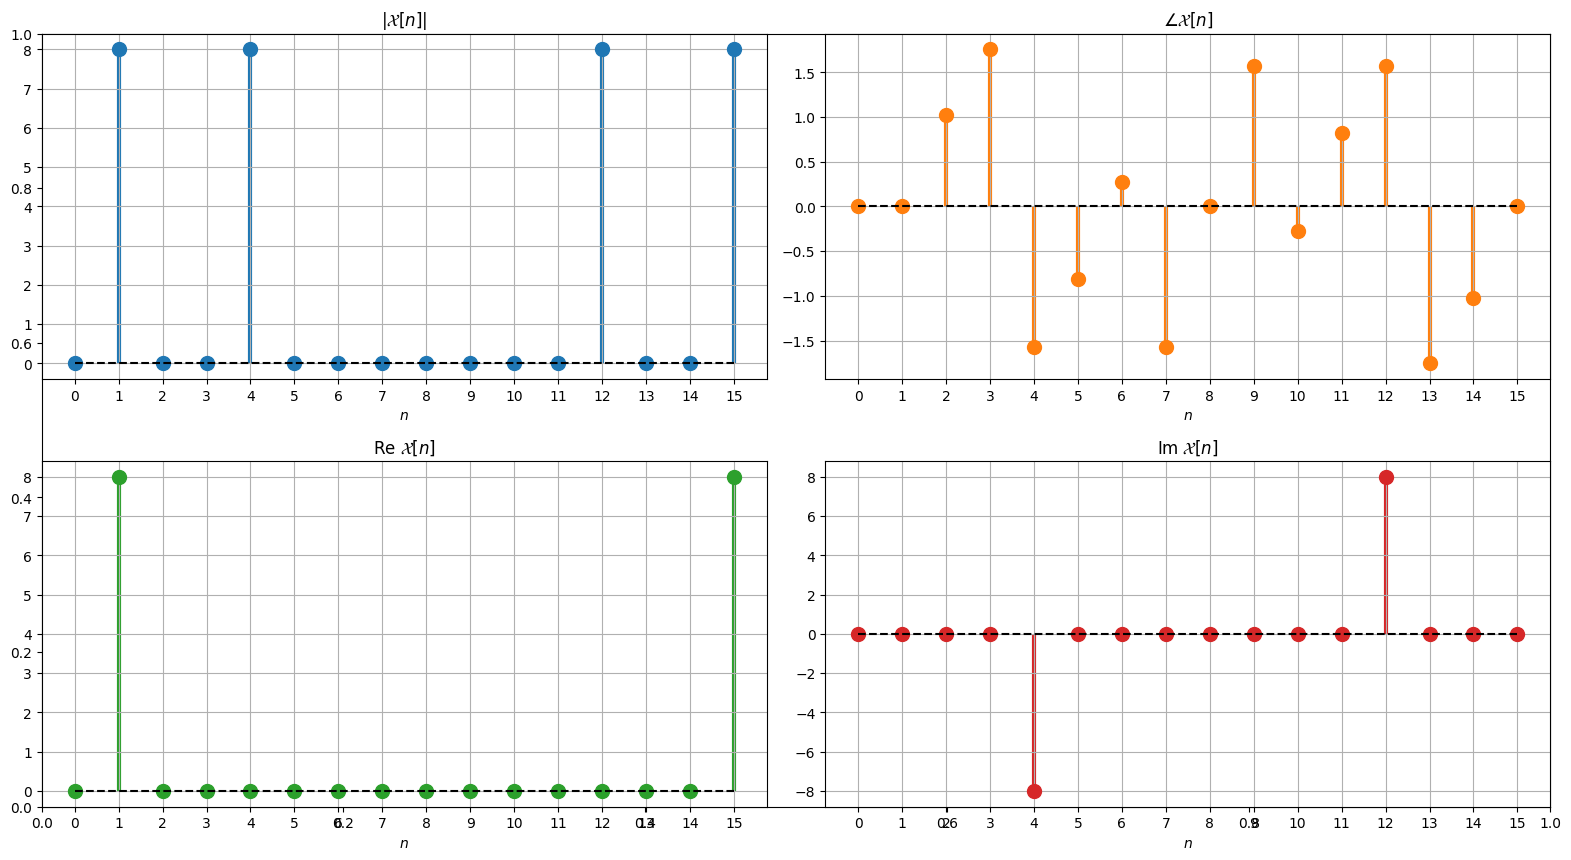

In [36]:
N = 16
r1 = 1
r2 = 4

k = np.arange(N)
x = np.cos(2*np.pi*r1*k/N) + np.sin(2*np.pi*r2*k/N)
X = np.fft.fft(x)

fig, ax = plt.subplots(figsize=(16,9))
for i, (function, title) in enumerate(zip([np.abs, np.angle, np.real, np.imag],
                                          ['$|\mathcal{X}[n]|$', '$\\angle  \mathcal{X}[n]$', 'Re $ \mathcal{X}[n]$', 'Im $\mathcal{X}[n]$'])):
    plt.subplot(2, 2, i+1)
    ml, sl, bl = plt.stem(np.arange(X.size), function(X), 'C%d'%i, basefmt = 'k--', markerfmt = 'C%do'%i)
    plt.setp(sl, lw=3, zorder = 1)
    plt.setp(ml, markersize = 10)
    plt.title(title)
    plt.xticks(np.arange(X.size))
    plt.xlabel('$n$')
    plt.grid()

plt.tight_layout()
plt.show()

# Модуль 3. Связь между ДПФ и ДВПФ. Частотная ось ДПФ.

## Задача 3.1. Связь ДПФ и ДВПФ для последовательностей конечной длительности.  
##Прямоугольное окно длиной N

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 20 | 18 | 16 | 14 | 12 | 20 | 24 | 30 | 32 |
  
Дана $N$-точечная последовательность $w[k]=\sum_{m=0}^{N-1} \mathbf{1} [k-m]$.  

* Изобразить график последовательности $w[k]$ средствами Python
* Вычислить с помощью `fft` ДПФ данной последовательности. Построить график.
* Дополнить последовательность $w[k]$ до $2N$ отсчетов нулями:
$$
y[k]=\left\{\begin{array}{l}
1, \text{при }  0 \le k \le N-1;
\\
0, \text{при } N \le k \le 2N-1.
\end{array}\right.
$$
При том изменяется только учитываемая длительность последовательности, влияющая на число отсчетов ДПФ.    
Сравнить результат работы `fft(w, 2*N)` c ДПФ для $y[k]$. Построить графики. 

* Повторить предыдущий пункт для последовательности $w[k]$ дополненой нулями до $4N$ отсчетов.

* Вычислить аналитически ДВПФ с помощью формулы прямого преобразования:
$$ W(\nu)= \sum_{k=-\infty}^{\infty} w[k]\exp(-j2\pi \nu k) $$  
Сравнить результат с работой функции `fft(w, 1024)`

* Построить график модуля ДВПФ $|W(\nu)|$ на отрезке $[-0.5, 0.5]$, используя функцию `fftshift`.



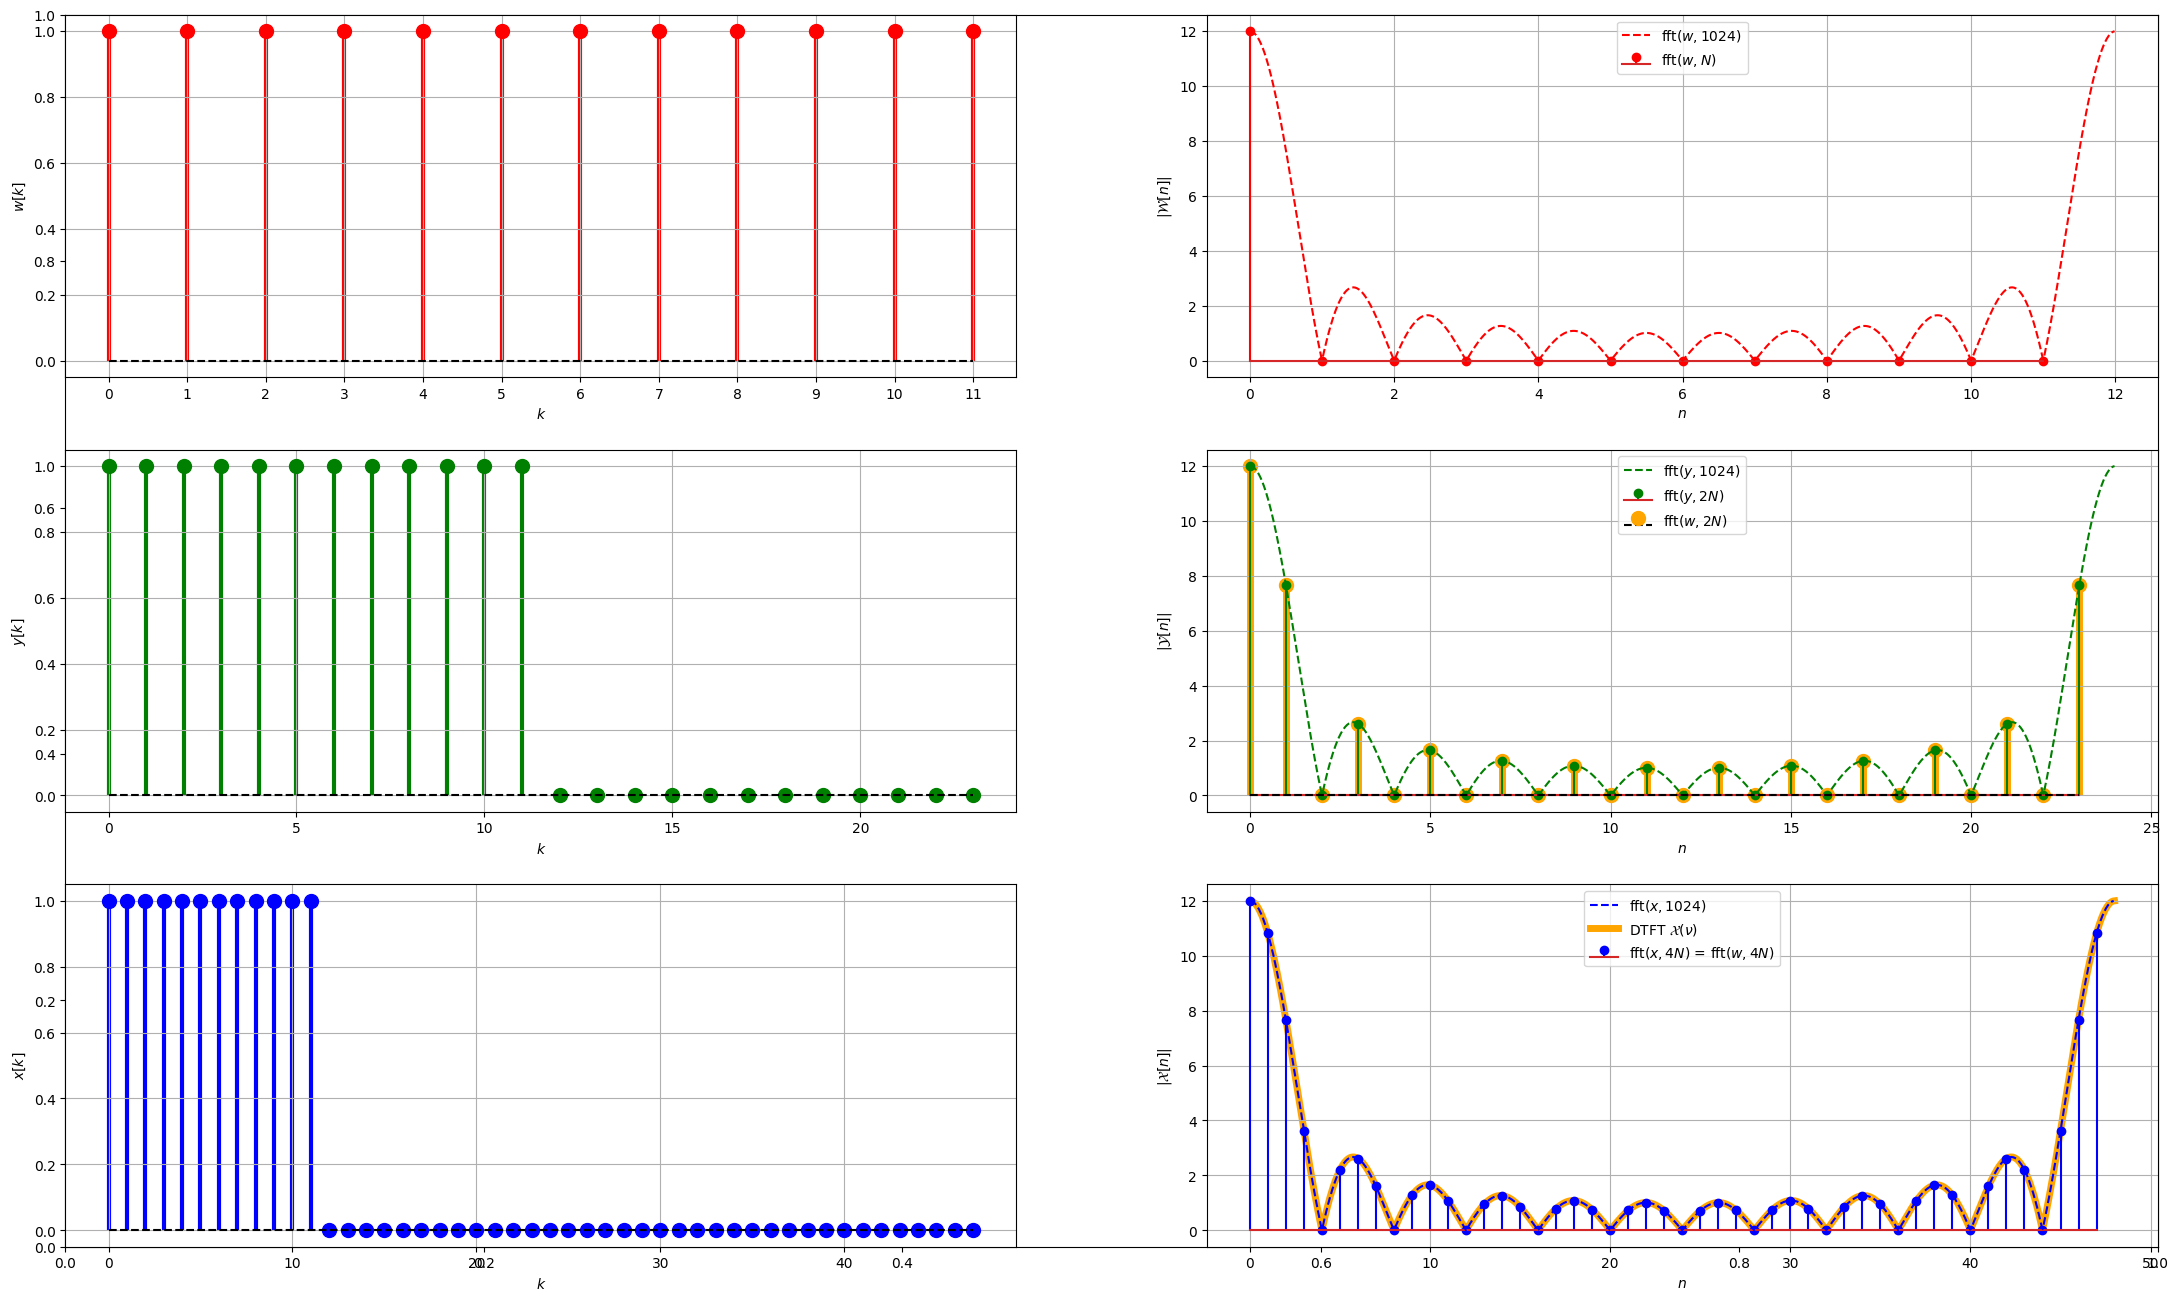

In [37]:
N = 12
M = 1024
w = np.ones(N)

fig, ax = plt.subplots(figsize=(27, 16))
plt.subplot(321)
ml, sl, bl = plt.stem(np.arange(N), w, 'r', basefmt = 'k--', markerfmt = 'ro')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xticks(np.arange(N))
plt.xlabel('$k$')
plt.ylabel('$w[k]$')
plt.grid()

plt.subplot(322)
plt.stem(np.arange(N), abs(np.fft.fft(w, N)), 'r', markerfmt = 'ro', label = 'fft($w, N$)')
plt.plot(np.arange(M)*N/M, abs(np.fft.fft(w, M)), 'r--', label = 'fft($w, {}$)'.format(M))
plt.xlabel("$n$")
plt.ylabel("$|\mathcal{W}[n]|$")
plt.legend()
plt.grid()

y = np.hstack((w, np.zeros(N)))

plt.subplot(323)
ml, sl, bl = plt.stem(np.arange(y.size), y, 'g', basefmt = 'k--', markerfmt = 'go')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xlabel('$k$')
plt.ylabel('$y[k]$')
plt.grid()
#plt.show()

plt.subplot(324)
#fig, ax = plt.subplots(figsize=(12,4))
plt.stem(np.arange(y.size), abs(np.fft.fft(y, y.size)), 'g', markerfmt = 'go', label = 'fft($y, 2N$)')
plt.plot(np.arange(M)*y.size/M, abs(np.fft.fft(y, M)), 'g--', label = 'fft($y, {}$)'.format(M))

ml, sl, bl = plt.stem(np.arange(2*N), abs(np.fft.fft(w, 2*N)), 'orange', basefmt = 'k--', markerfmt = 'o', label = 'fft($w, 2N$)')
plt.setp(sl, lw=5, zorder = -100)
plt.setp(ml, markersize = 10, color = 'orange', zorder = -100)
    
plt.xlabel("$n$")
plt.ylabel("$|\mathcal{Y}[n]|$")
plt.legend()
plt.grid()

x = np.hstack((y, np.zeros(2*N)))

plt.subplot(325)
ml, sl, bl = plt.stem(np.arange(x.size), x, 'b', basefmt = 'k--', markerfmt = 'bo')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xlabel('$k$')
plt.ylabel('$x[k]$')
plt.grid()

@np.vectorize
def DTFT_custom(tick):
    return np.exp(-1j * np.pi * tick *(N-1)) * np.sin(N * np.pi * tick) / np.sin(np.pi * tick)

plt.subplot(326)
plt.stem(np.arange(x.size), abs(np.fft.fft(x, x.size)), 'b', markerfmt = 'bo', label = 'fft($x, 4N$) = fft($w, 4N$)')
plt.plot(np.arange(M)*x.size/M, abs(np.fft.fft(x, M)), 'b--', label = 'fft($x, {}$)'.format(M))
nu = np.linspace(0.001, 1, 2*M)
plt.plot(nu*x.size, abs(DTFT_custom(nu)), 'orange', lw = 5, zorder = -1, label = 'DTFT $\mathcal{X}(\\nu)$')

plt.xlabel("$n$")
plt.ylabel("$|\mathcal{X}[n]|$")
plt.legend()
plt.grid()

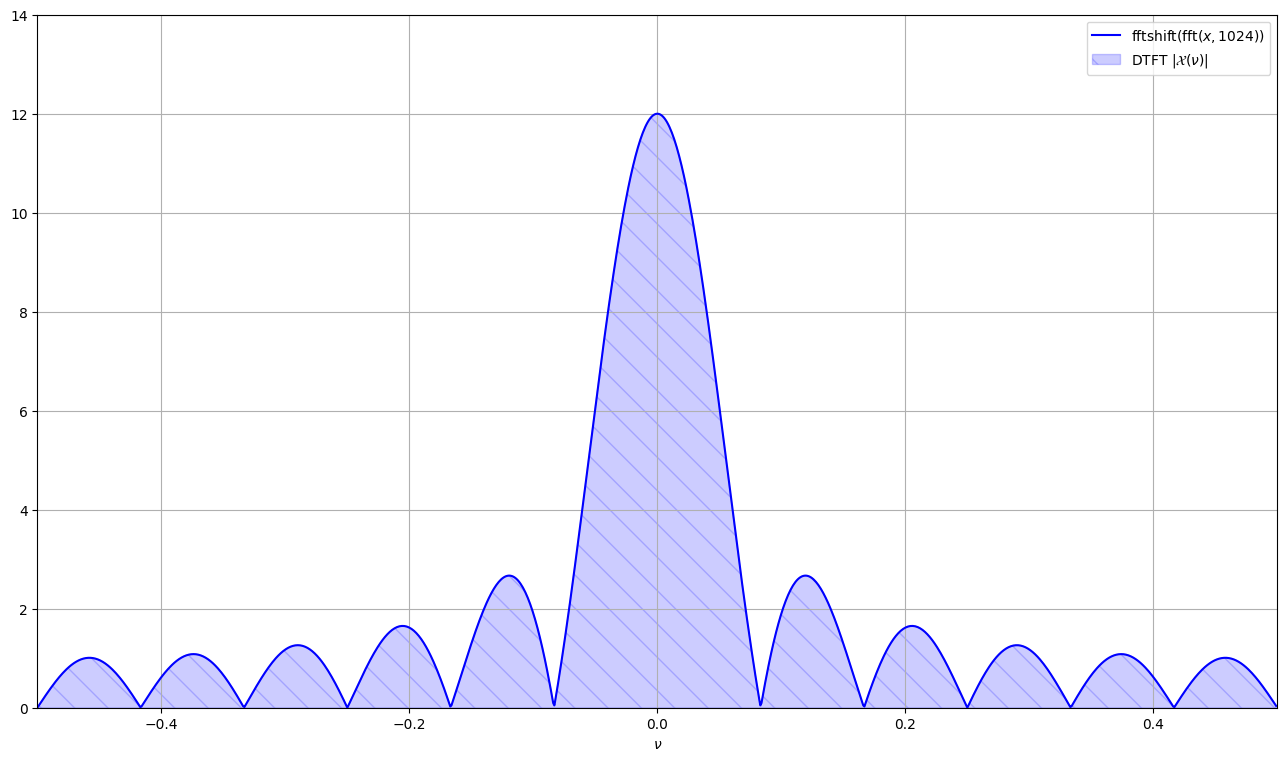

In [38]:
@np.vectorize
def DTFT_custom(tick):
    return np.exp(-1j * np.pi * tick * (N-1)) * np.sin(N * np.pi * tick) / np.sin(np.pi * tick)

M = 1024
N = 12
fig, ax = plt.subplots(figsize=(16, 9))
plt.plot(-0.5+(np.arange(M)/M), abs(np.fft.fftshift(np.fft.fft(x, M))), color = 'blue', label = 'fftshift(fft($x, 1024$))')
nu = np.linspace(-0.5, 0.5, M)
plt.fill_between(nu, abs(DTFT_custom(nu)), color = 'blue', alpha = 0.2, label = 'DTFT $|\mathcal{X}(\\nu)|$', hatch = '\\')

plt.xlim(-0.5, 0.5)
plt.ylim(0, N+2)
plt.grid()
plt.xlabel('$\\nu$')
plt.legend()
plt.show()

## Задача 3.2. Связь между ДВПФ и ДПФ для периодических последовательностей. 

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   | 16 | 12 | 14 | 16 | 14 | 12 | 24 | 20 | 18 | 16 |
|   $r_1$   |  3 |  2 |  6 |  7 |  6 |  1 |  7 |  3 |  3 |  2 |
|   $r_2$   |  7 |  4 |  2 |  3 |  4 |  4 |  5 |  7 |  5 |  5 |

Задана периодическая последовательность с периодом $N$
$$x[k]=\sin(2\pi k r_1/N)+\cos(2\pi k r_2/N).$$ 
* Вычислите аналитически ДВПФ
* Вычислите с помощью моделирования $N$—точечное ДПФ этой последовательности $\tilde{X} [n]$ (с нормировкой на число отсчетов). 

* Сравните веса $\delta$-функций в ДВПФ и величины отсчетов ДПФ.

$$ \mathcal{X}(\nu) = \sum \limits_{k=-\infty}^{+\infty} x[k] \exp{\left(-j 2\pi k \nu \right)} =
\sum \limits_{k=-\infty}^{+\infty} x[k] \left( \sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[k-m] \right)\exp{\left(-j 2\pi k \nu \right)} = \\
= \sum \limits_{k=-\infty}^{+\infty} \dfrac{1}{2j}\exp{\left(j 2\pi \dfrac{r_1}{N} k \right)}  \left( \sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[k-m] \right)\exp{\left(-j 2\pi k \nu \right)} - 
\sum \limits_{k=-\infty}^{+\infty} \dfrac{1}{2j}\exp{\left(-j 2\pi \dfrac{r_1}{N} k \right)}  \left( \sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[k-m] \right)\exp{\left(-j 2\pi k \nu \right)} + \\
+ \sum \limits_{k=-\infty}^{+\infty} \dfrac{1}{2j}\exp{\left(j 2\pi \dfrac{r_2}{N} k \right)}  \left( \sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[k-m] \right)\exp{\left(-j 2\pi k \nu \right)} +
\sum \limits_{k=-\infty}^{+\infty} \dfrac{1}{2j}\exp{\left(-j 2\pi \dfrac{r_2}{N} k \right)}  \left( \sum \limits_{m=-\infty}^{+\infty} \mathbf{1}[k-m] \right)\exp{\left(-j 2\pi k \nu \right)} = \\
= -\dfrac{j}{2}\sum \limits_{n=\infty}^{+\infty} \delta \left(\nu - \frac{r_1}{N} -n \right)
+ \dfrac{j}{2}\sum \limits_{n=\infty}^{+\infty} \delta \left(\nu + \frac{r_1}{N} -n \right) +
+\dfrac{1}{2}\sum \limits_{n=\infty}^{+\infty} \delta \left(\nu - \frac{r_2}{N} -n \right)
+\dfrac{1}{2}\sum \limits_{n=\infty}^{+\infty} \delta \left(\nu + \frac{r_2}{N} -n \right) = \\
= \sum \limits_{n=\infty}^{+\infty} \left\{-\dfrac{j}{2}\delta \left(\nu - \frac{r_1}{N} -n \right) + \dfrac{j}{2}\delta \left(\nu + \frac{r_1}{N} -n \right) + \dfrac{1}{2}\delta \left(\nu - \frac{r_2}{N} -n \right) + \dfrac{1}{2}\delta \left(\nu + \frac{r_2}{N} -n \right)  \right\}.
$$

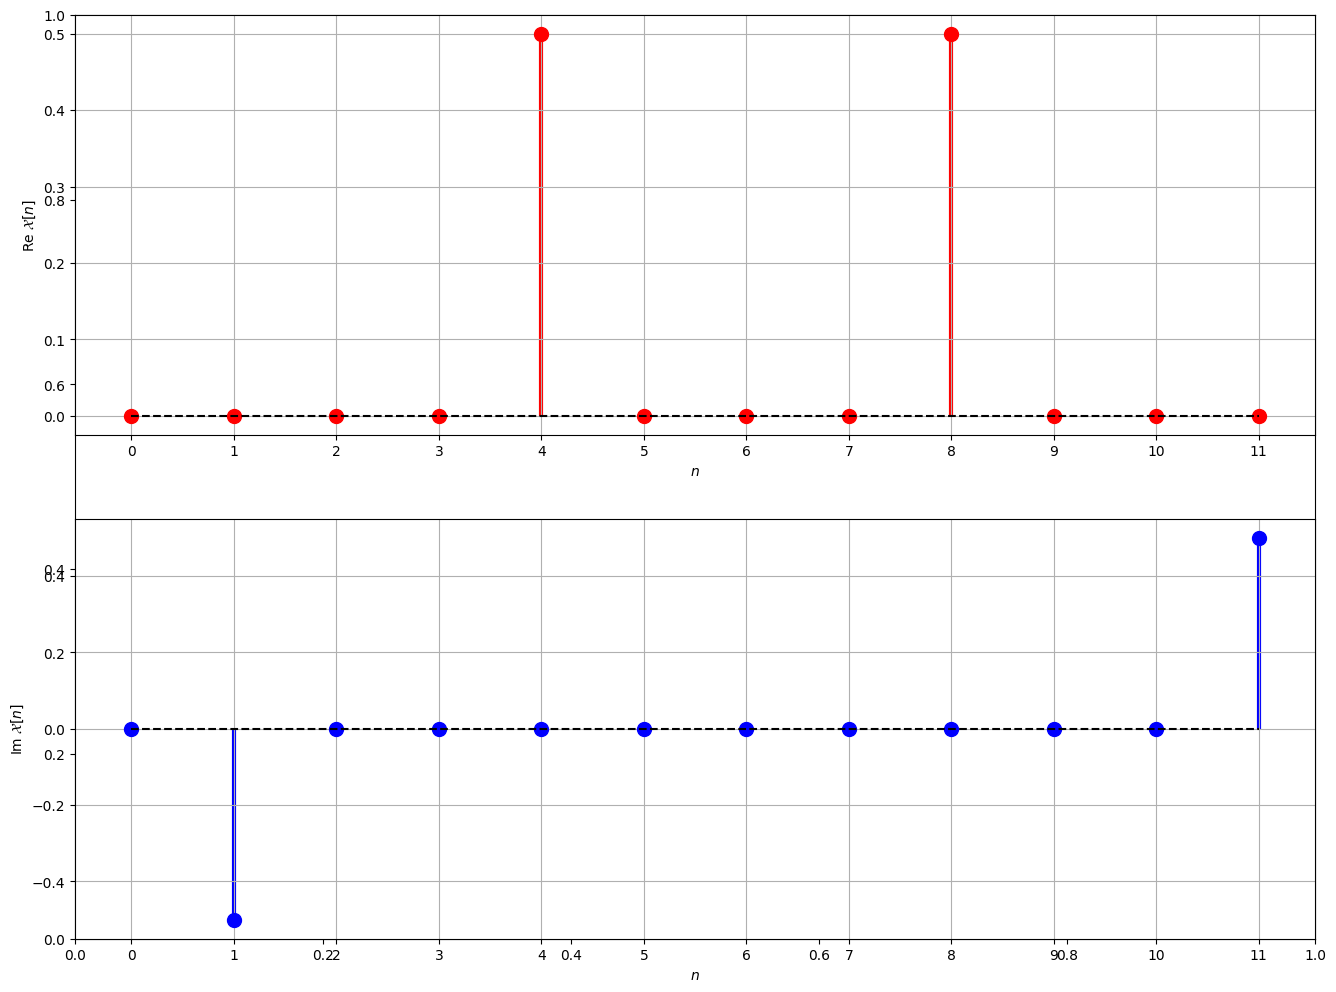

In [39]:
N = 12
r1 = 1
r2 = 4
k = np.arange(N)
x = np.sin(2*np.pi*k*r1/N) + np.cos(2*np.pi*k*r2/N)
X = np.fft.fft(x)/N

fig, ax = plt.subplots(figsize=(16, 12))
plt.subplot(211)
ml, sl, bl = plt.stem(np.arange(X.size), np.real(X), 'r', basefmt = 'k--', markerfmt = 'r' + 'o')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.xticks(np.arange(X.size))
plt.xlabel('$n$')
plt.ylabel('Re $\mathcal{X}[n]$')
plt.grid()

plt.subplot(212)
ml, sl, bl = plt.stem(np.arange(X.size), np.imag(X), 'b', basefmt = 'k--', markerfmt = 'b' + 'o')
plt.setp(sl, lw=3, zorder = 1)
plt.setp(ml, markersize = 10)
plt.ylabel('Im $\mathcal{X}[n]$')
plt.xticks(np.arange(X.size))
plt.xlabel('$n$')
plt.grid()

plt.show()

## Задача 3.3. Сравнение вычислительной эффективности

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |    7 |    8 |    9 |    10 | 
|:---------:|----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|-----:|
|   **N**   |   512 |   512 |   256 |   256 |   512 |   512 |   512 |   512 |   512 |   256 |
|   **P**   | 32768 | 32768 | 65536 | 65536 | 32768 | 65536 | 32768 | 65536 | 32768 | 32768 |

Дана $N$-точечная последовательность отсчетов
$$ x[k]= \sin(2\pi kn_0/N)$$  
Посчитать ДВПФ с использованием Python в $P$ точках для этой последовательности, где $n_0$ выбранное вами целое число на отрезке $ 0 < n_0 < N/2 $
* используя формулы ДВПФ напрямую, 
* используя БПФ `fft(x, P)`. 

Сравнить максимальную ошибку и время работы программы в двух случаях. Построить график $|X(\nu)|$.

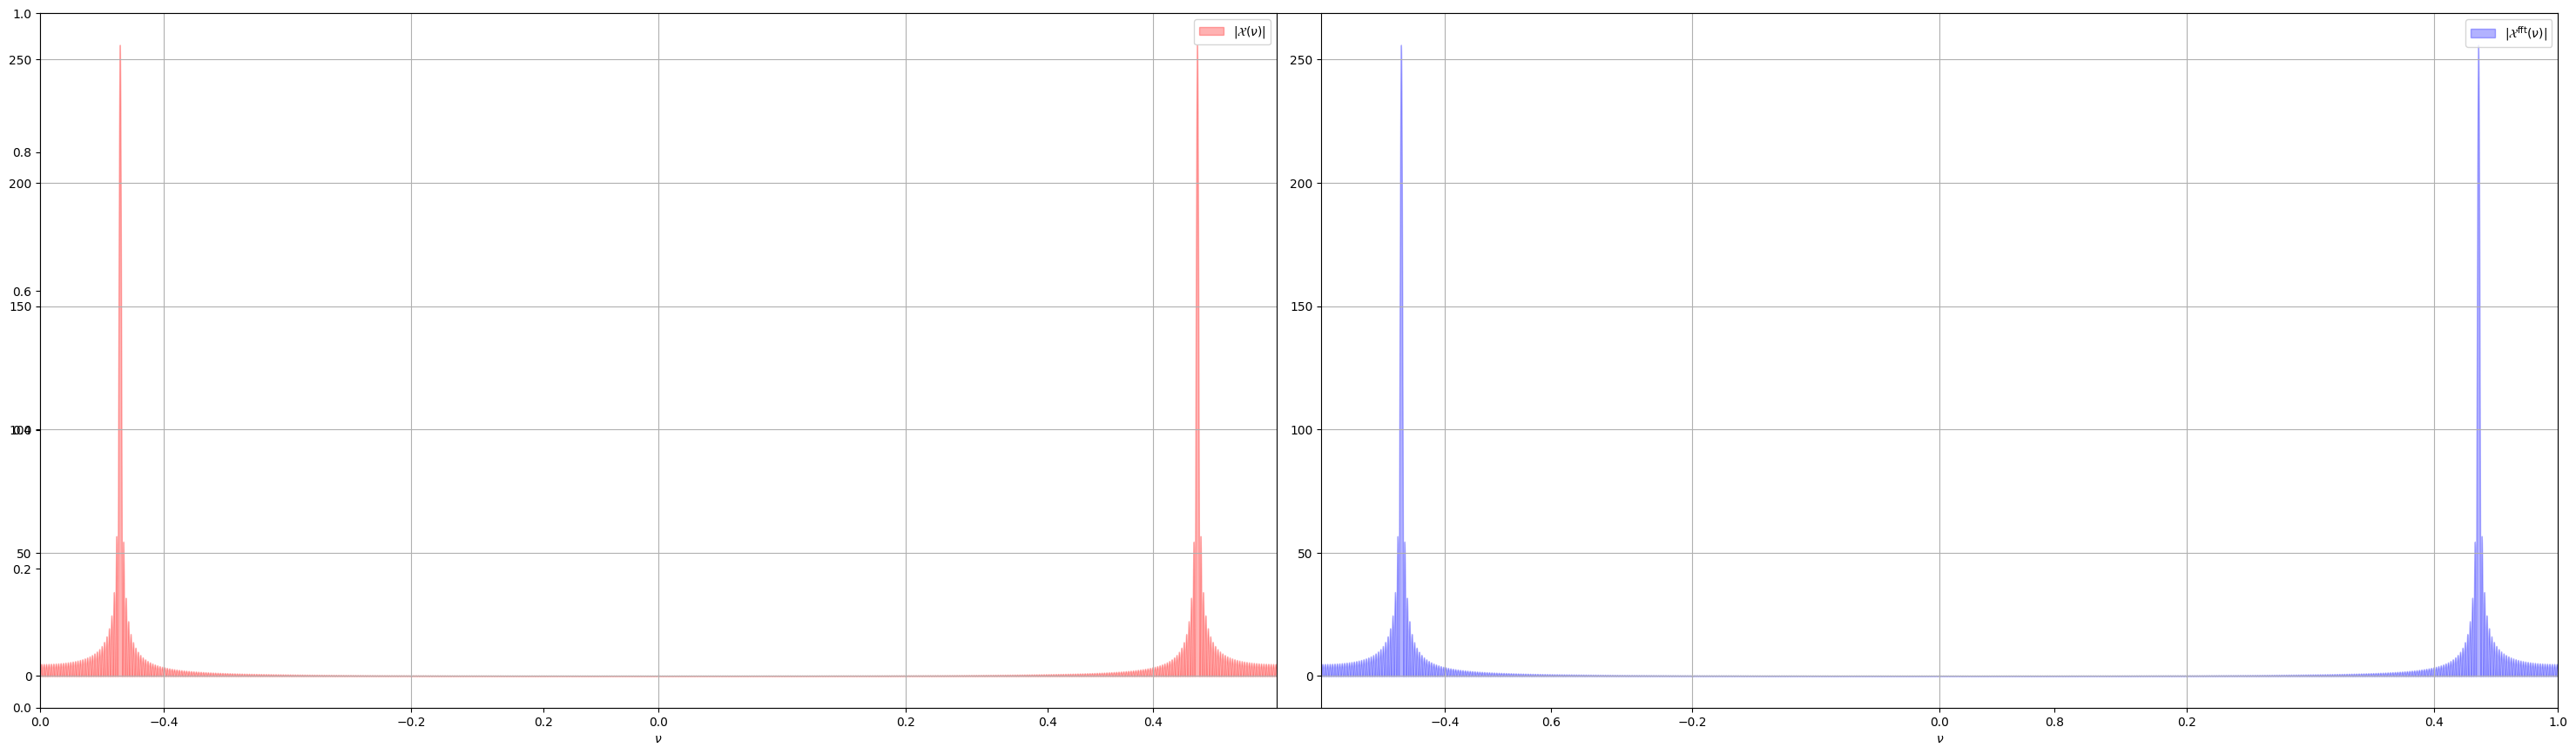

custom vs fft [s]:  0.8528640270233154  vs  0.0009205341339111328
L_inf diff: 8.107912214503263e-12 
L2 diff:  1.931294583383989e-10 
L2 diff per tick:  2.9469216665405107e-15


In [40]:
N = 512
P = 65536
n_0 = np.random.randint(1, N//2)

x = np.sin(2*np.pi*n_0/N*np.arange(N))

@np.vectorize
def custom_DTFT(tick):
    return x @ np.exp(-1j*np.arange(N) * 2 * np.pi * tick) 
    
nu = np.arange(P)/P - 0.5

startpoint = time.time()
X = custom_DTFT(nu)
midpoint = time.time()
X_fft = np.fft.fftshift(np.fft.fft(x, P))
endpoint = time.time()


fig, ax = plt.subplots(figsize=(30, 9))   
plt.subplot(121)
plt.fill_between(nu, abs(X), color = 'red', alpha = 0.3, label = '$|\mathcal{X}(\\nu)|$')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('$\\nu$')
plt.grid()

plt.subplot(122)
plt.fill_between(nu, abs(X_fft), color = 'blue', alpha = 0.3, label = '$|\mathcal{X}^{\\text{fft}}(\\nu)|$')
plt.xlim(-0.5, 0.5)
plt.legend()
plt.xlabel('$\\nu$')
plt.grid()

plt.tight_layout()
plt.show()
plt.close()

delta = np.linalg.norm(X - X_fft)
delta_abs = max(abs(X - X_fft))
print('custom vs fft [s]: ', midpoint - startpoint, ' vs ', endpoint - midpoint)
print('L_inf diff:', delta_abs, '\nL2 diff: ', delta, '\nL2 diff per tick: ', delta/P)

## Задача 3.4. Частотная ось ДПФ (соответствие номеров отсчетов и частот).

| Варианты: |   1 |    2 |    3 |    4 |    5 |    6 |
|:---------:|:----:|:-----:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`vibraphone.wav`|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|`flute.wav`|


| Варианты: |    7 |    8 |    9 |    10 |
|:---------:|:-----:|:-----:|:-----:|:-----:|
|**Аудиозапись:**|`clarinet.wav`|`glockenspiel.wav`|`tuning-fork.wav`|`guitar.wav`|

Для аудиозаписи вашего варианта:
* указать шаг и частоту дискретизации; 
* выбрать некоторый интервал отсчетов в информативной области сигнала и для него осуществить ДПФ-анализ, объяснить выбор этой области;
* определить с помощью ДПФ-анализа частоту основого колебания.

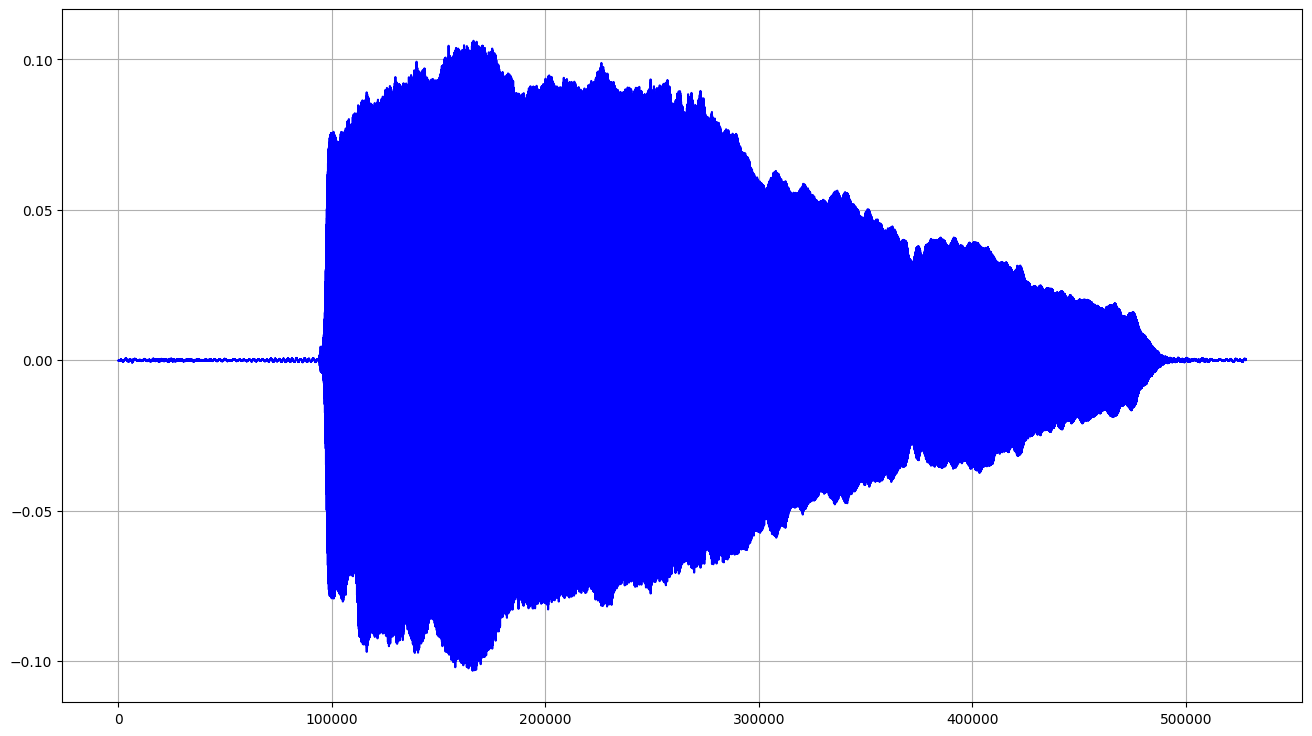

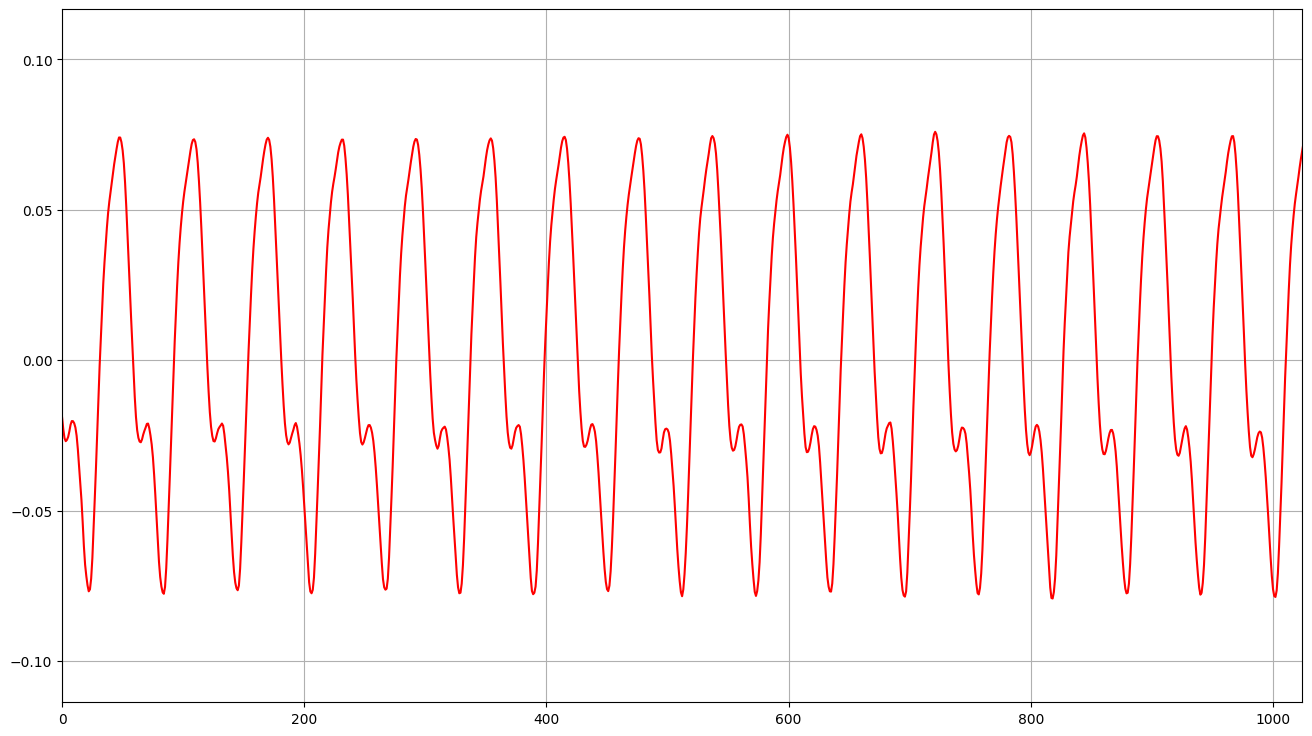

In [41]:
import os
M = 400000
x, fs = sf.read(os.path.join('wav_files','flute.wav'))
fig, ax = plt.subplots(figsize=(16, 9)) 
plt.plot(x, 'blue')
plt.grid()
plt.show()
plt.close()

shift = 100000
fig, ax = plt.subplots(figsize=(16, 9)) 
plt.plot(x[shift:shift+M], 'red')
plt.xlim(0, 2**10)
plt.grid()
plt.show()
plt.close()

x = x[shift:shift+M]

In [42]:
print("Частота дискретизации: {} Hz".format(fs)) 
print("Шаг дискретизации: {:.3f} us".format(1e6 * 1/fs)) 

Частота дискретизации: 48000 Hz
Шаг дискретизации: 20.833 us


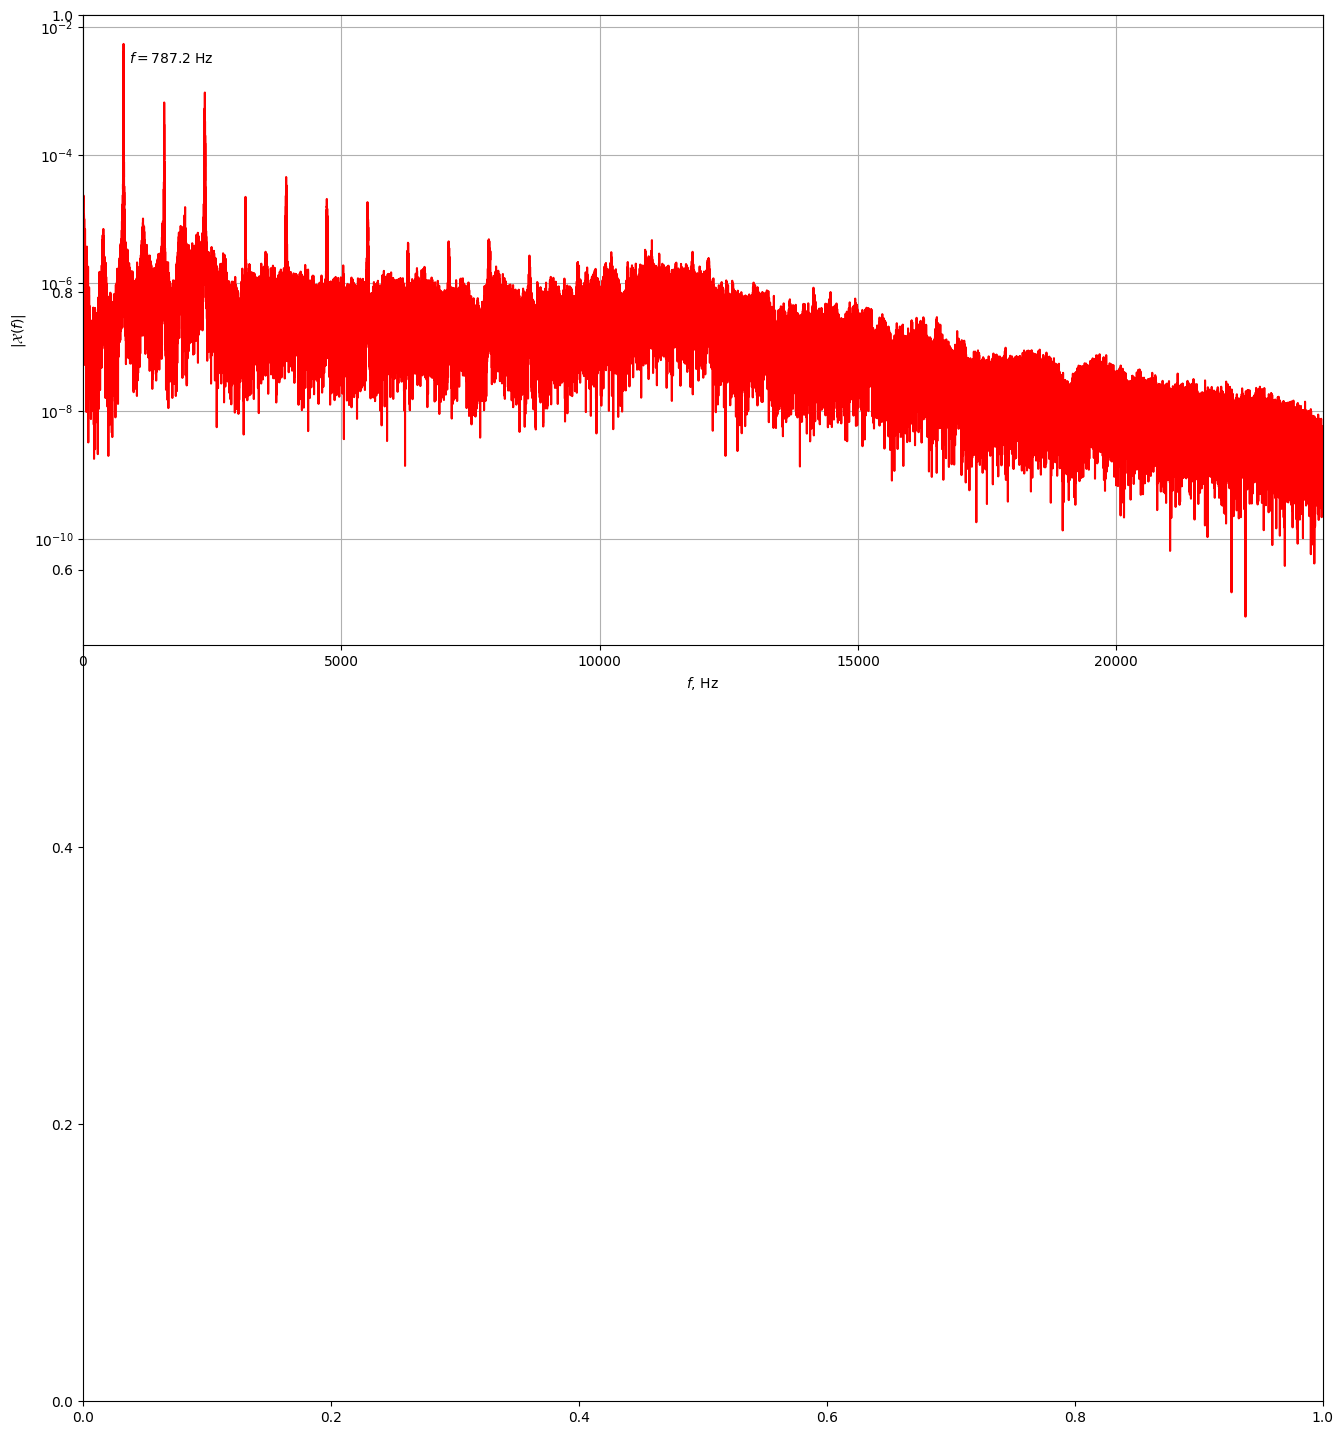

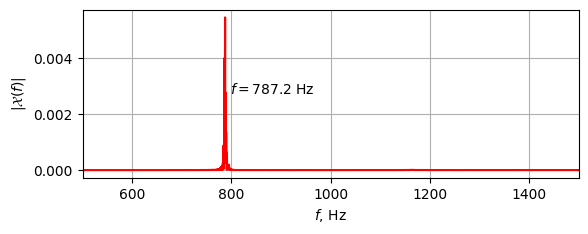

freq=787.2000000000012


In [44]:
x = x*signal.windows.hann(M)
data = list(abs(np.fft.fftshift(np.fft.fft(x, M)))/M)
index = data.index(max(data))
freq = abs((1/2 - index/M)*fs)

fig, ax = plt.subplots(figsize=(16, 18)) 
plt.subplot(211)
plt.plot((-0.5+(np.arange(M)/M))*fs, data, 'red')
plt.annotate('$f = {:.1f}$ Hz'.format(freq), (freq+100, max(data)/2))
plt.axis(xmin=0, xmax=fs/2)
plt.xlabel('$f$, Hz')
plt.yscale('log')

plt.ylabel('$|\mathcal{X}(f)|$')
plt.grid()
plt.show()
plt.close()

plt.subplot(212)
plt.plot((-0.5+(np.arange(M)/M))*fs, data, 'red')
plt.annotate('$f = {:.1f}$ Hz'.format(freq), (freq+10, max(data)/2))
plt.axis(xmin=500, xmax=1500)
plt.xlabel('$f$, Hz')
plt.ylabel('$|\mathcal{X}(f)|$')
plt.grid()

plt.show()
plt.close()


print(f"{freq=}")